## Red Wine Quality Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [2]:
wine_df = pd.read_csv("winequality-red.csv")

In [3]:
print("Dataset Shape:", wine_df.shape)
print(wine_df.info())

Dataset Shape: (1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [4]:
print(wine_df.describe())
print(wine_df.head())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

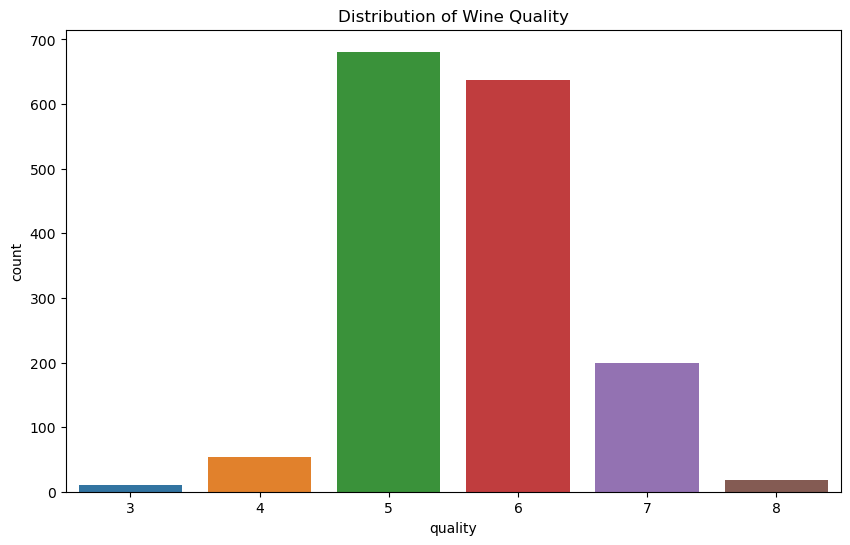

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine_df)
plt.title('Distribution of Wine Quality')
plt.show()

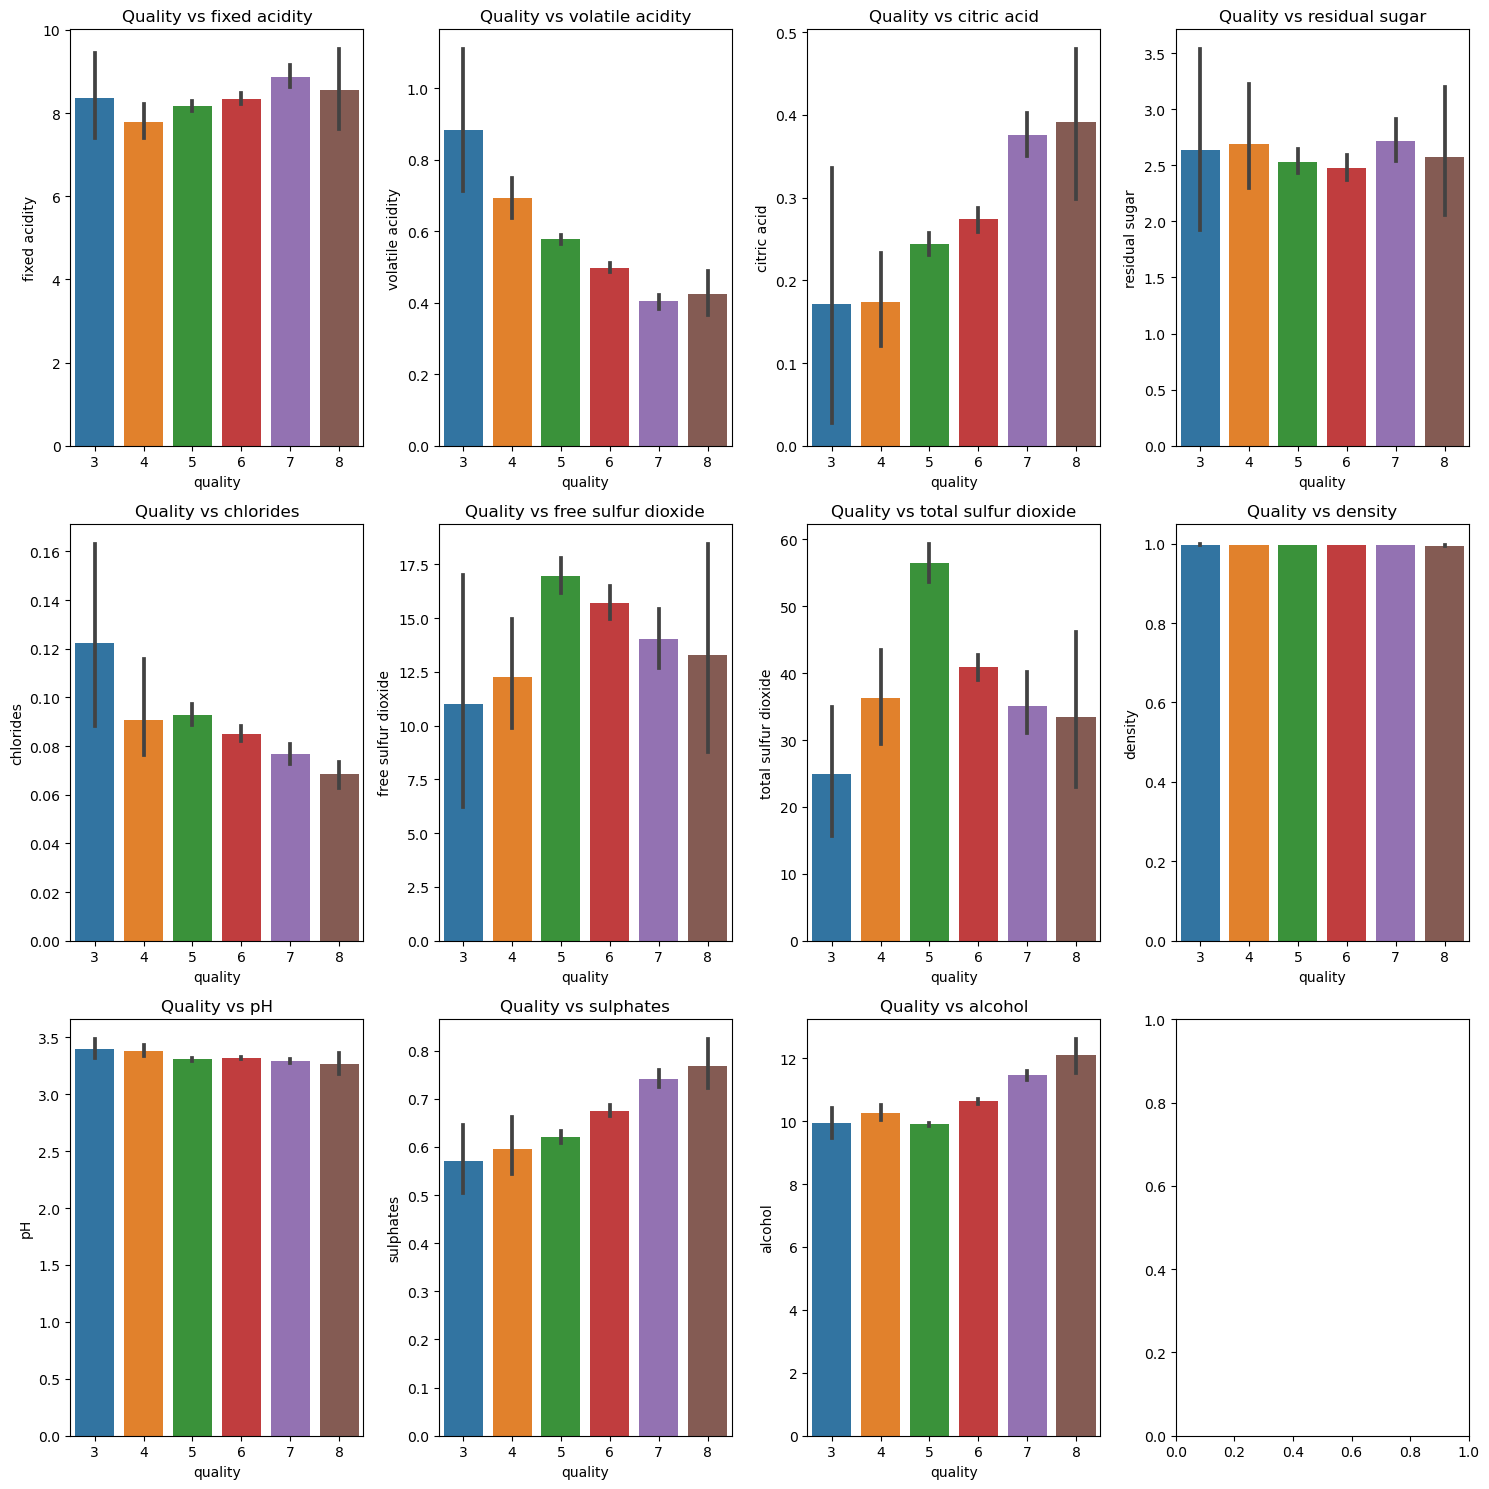

In [6]:
features = wine_df.columns[:-1]
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
for i, feature in enumerate(features):
    sns.barplot(x='quality', y=feature, data=wine_df, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Quality vs {feature}')
plt.tight_layout()
plt.show()

In [7]:
wine_df['quality'] = wine_df['quality'].apply(lambda x: 1 if x > 6 else 0)

In [8]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = rf_classifier.predict(X_test)

In [13]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
total_predictions = np.sum(cm)
correct_predictions = np.trace(cm)
incorrect_predictions = total_predictions - correct_predictions

In [14]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[264   9]
 [ 23  24]]


In [15]:
print("\nTotal Predictions:", total_predictions)
print("Correct Predictions:", correct_predictions)
print("Incorrect Predictions:", incorrect_predictions)


Total Predictions: 320
Correct Predictions: 288
Incorrect Predictions: 32


In [16]:
print("\nAccuracy Score:")
print(accuracy)


Accuracy Score:
0.9


In [17]:
print("\nAccuracy Percentage:")
print(f"{accuracy * 100:.2f}%")


Accuracy Percentage:
90.00%


In [18]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



In [19]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

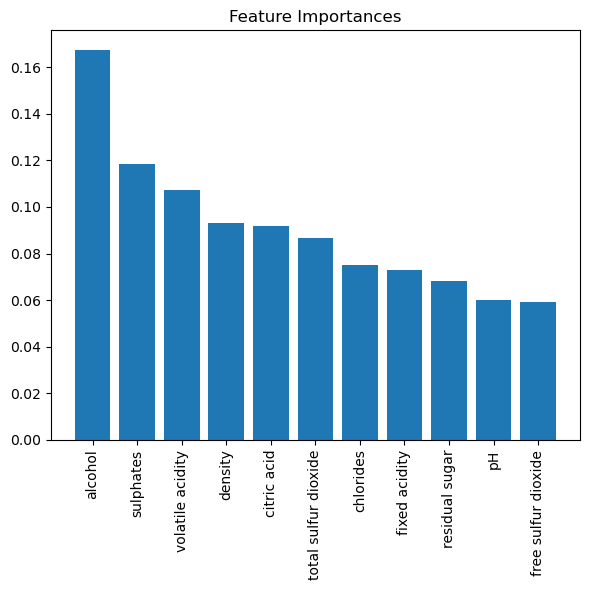

In [20]:
plt.figure(figsize=(6, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()